# MOVIELENS RECOMMENDATION SYSTEMS


### Collaborators
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

![movie-img.jpeg](movie-img.jpeg)

# 1.BUSINESS UNDERSTANDING

## 1.1 Overview

In today's world of massive data growth, recommendation systems have become essential tools for filtering information and enhancing user experiences. These systems help users find relevant content by analyzing their past behaviors, such as search queries or browsing histories.

Companies like YouTube and Spotify use recommendation algorithms to suggest the next video or curate personalized playlists based on user preferences.

In line with our project objective we aim to harness the power of data analysis to build a movie recommendation system that provides users with personalized movie suggestions.

By analyzing user ratings of other movies, we can generate tailored recommendations that align with individual preferences. The goal is to develop a model that delivers the top 5 movie recommendations for each user, optimizing their viewing experience based on their previous interactions.

## 1.2 Problem statement

With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## 1.3 Objectives

- Develop a model to provide personalized top 5 movie recommendations for users based on their ratings and preferences, utilizing collaborative filtering techniques.

- Determine the rating frequency of users based on various features, such as genre, director, and release year, to identify patterns in user preferences.

- Analyze key features that contribute to the popularity of trending movies to enhance the effectiveness of the recommendation system in suggesting relevant content.

- Implement collaborative filtering techniques, including both user-based and item-based methods, to segment users and items, improving the accuracy of personalized recommendations.

- Create a solution to address the cold start problem by recommending popular and trending movies to new users with no prior ratings, ensuring an engaging initial experience.


## 1.4 Data Limitations.

While the MovieLens dataset is valuable for building a movie recommender system, it has some limitations:

* Limited Temporal Coverage: The dataset spans a specific time period, which may not capture the most recent trends or preferences.

* Cold-Start Problem: The system may struggle to provide recommendations for new users or movies with limited ratings or tags.

* Bias in Ratings: User ratings can be influenced by various factors, such as popularity bias or groupthink, which may affect the accuracy of recommendations.

# 2. DATA UNDERSTANDING

## 2.1 Data Source

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

##### 1. `links.csv`
Contains identifiers linking MovieLens movies to external databases (IMDB and TMDb). The structure is:



| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie in the MovieLens dataset    |
| `imdbId`  | Corresponding movie ID from IMDb                       |
| `tmdbId`  | Corresponding movie ID from The Movie Database (TMDb)  |



##### 2. `movies.csv`
This file includes movie titles and their associated genres. The data is structured as follows:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie                             |
| `title`   | Movie title, including the year of release (e.g., *Toy Story (1995)*) |
| `genres`  | Pipe-separated list of genres (e.g., *Animation|Children's|Comedy*)   |



##### 3. `ratings.csv`
This file contains explicit user ratings for movies on a **5-star scale**. The data is structured as:

| Column   | Description                                   |
|----------|-----------------------------------------------|
| `userId` | Anonymized ID representing each user          |
| `movieId`| ID representing each movie                    |
| `rating` | User rating for the movie (0.5 to 5.0 stars)  |
| `timestamp` | UNIX timestamp when the rating was made     |

Ratings are sorted first by `userId`, then by `movieId`.

##### 4. `tags.csv`
Tags represent user-generated metadata (e.g., short descriptions or labels). The structure is:

| Column   | Description                                    |
|----------|------------------------------------------------|
| `userId` | Anonymized ID representing each user           |
| `movieId`| ID representing each movie                     |
| `tag`    | User-assigned tag for the movie                |
| `timestamp` | UNIX timestamp when the tag was added       |

Like ratings, tags are sorted by `userId` and then by `movieId`


  

## 2.2 Data loading and Inspection


In [1]:
## Importing the libraries

import pandas as pd
import numpy as np


In [2]:
# Using pandas to read the CSV files
links = pd.read_csv(r"D:\PROJECT\Movielens-Recommendation-System\ml-latest-small\links.csv")
movies = pd.read_csv(r"D:\PROJECT\Movielens-Recommendation-System\ml-latest-small\movies.csv")
ratings = pd.read_csv(r"D:\PROJECT\Movielens-Recommendation-System\ml-latest-small\ratings.csv")
tags = pd.read_csv(r"D:\PROJECT\Movielens-Recommendation-System\ml-latest-small\tags.csv")

#### Observations made from data undertanding

- All the four files have a common feature which is the movieID column.

- The links and the movie datasets have equal number of rows of 9742.

- Each dataset presents a mixed type of data.(int64, object and float64)

## 2.3 Merging Files

Given that the four datasets share a common feature, the movie ID, we will use this column to perform a merge, consolidating the datasets into a single file. This approach ensures not only the integration of information from different sources but also enhances data completeness and facilitates more thorough analysis.

In [3]:
## Merging files on the common feature the MovieID

##Step 1: Merging the movies and the links datasets.
movies_links_merged =  pd.merge(movies, links, on='movieId', how='inner')
movies_links_merged.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [4]:
##Step 2: Merging the movies_links_merged and ratings datasets on movieId

movies_links_ratings_merged =pd.merge(ratings, movies_links_merged,on='movieId', how='inner')
movies_links_ratings_merged.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [6]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on=['movieId','userId'])
final_merge.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [7]:
## Checking the number of rows and colums of our final merged dataset

rows, colums = final_merge.shape
print(f'The final merged dataset contains {rows} rows and {colums} colums')

The final merged dataset contains 3476 rows and 10 colums


In [8]:
##Getting the conside summary of the final merged dataset

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       3476 non-null   int64  
 1   movieId      3476 non-null   int64  
 2   rating       3476 non-null   float64
 3   timestamp_x  3476 non-null   int64  
 4   title        3476 non-null   object 
 5   genres       3476 non-null   object 
 6   imdbId       3476 non-null   int64  
 7   tmdbId       3476 non-null   float64
 8   tag          3476 non-null   object 
 9   timestamp_y  3476 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 298.7+ KB


The output shows that the final_merged dataset contains 3 types as follows:
- 2 float64
- 6 int664
- 3 Object

The memory usage of the final merged dataset is approximately 21.4 MB. This suggests that the dataset has grown significantly after merging, especially due to the repetition of movie information across different user ratings and tag.

High Movie Engagement: The fact that the merged dataset contains 233,213 rows while the ratings dataset had 100,836 rows suggests that multiple users have rated, tagged, or interacted with the same movie, indicating high engagement for some movies.


In [9]:
final_merge.describe()

,userId,movieId,rating,timestamp_x,imdbId,tmdbId,timestamp_y
count,3476.000000,3476.000000,3476.000000,3.476000e+03,3.476000e+03,3476.000000,3.476000e+03
mean,429.785386,28009.502301,4.016830,1.297281e+09,4.920095e+05,33499.696203,1.323525e+09
std,161.552990,44138.125029,0.856925,2.038080e+08,8.193528e+05,75172.715180,1.731554e+08
min,2.000000,1.000000,0.500000,9.746667e+08,1.234900e+04,11.000000,1.137179e+09
25%,424.000000,1261.500000,3.500000,1.100120e+09,9.740875e+04,680.000000,1.138032e+09
50%,474.000000,4492.000000,4.000000,1.281766e+09,1.207750e+05,7708.000000,1.279956e+09
75%,523.250000,45499.000000,5.000000,1.498457e+09,3.953342e+05,19913.000000,1.498457e+09
max,610.000000,193565.000000,5.000000,1.537099e+09,5.580390e+06,503475.000000,1.537099e+09


userId_x and userId_y: The user IDs range from 1 to 610, which shows that there are 610 unique users in the dataset

Each column has 233,213 entries, meaning no missing values for the columns shown (movieId, imdbId, tmdbId, userId_x, rating, timestamp_x, userId_y, timestamp_y).

Movie IDs range from 1 to 193565, suggesting a large dataset covering a wide variety of movies.
The 50th percentile (50%, or median) movie ID is 1198, indicating that half the movies have an ID less than 1198.
The average (mean) movie ID is 12319.99, which is much higher than the median, indicating a right-skewed distribution of movie IDs (a few movies with very high IDs).

imdbId and tmdbId: Similarly, the IMDb IDs and TMDB IDs show a broad range from 12,349 to 5,580,390 (IMDb) and from 11 to 503,475 (TMDB), also suggesting a wide variety of movie records. The high standard deviation indicates significant variation in these IDs.

The mean rating is approximately 3.97, indicating that, on average, users gave higher ratings (closer to 4)

The mean timestamp (timestamp_x) is about 1.213 billion, which corresponds to around 2008 and maximum timestamp suggests ratings were given around 2018.

Right-skewed Distribution: Both movieId and rating columns exhibit right-skewed distributions. This could influence modeling choices, as the majority of movies or users may fall within a specific subset of the range.

In [10]:
#creating a copy of the final merge for to perform data cleaning
Movies_df = final_merge
Movies_df.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


## 3.DATA CLEANING

Now that we have merged our dataset, we will take the following steps to ensure it is clean and ready for analysis:

1. `Checking and handling duplicates columns` to avoid redundancy.

2. `Renaming columns` to improve readability.

3. `Case Conversion` to ensure that all our headers are standadized.

4. `Checking for missing` and address them appropriately.

5. `Ensure consistent data types` across all columns.

6. `Creating new features from existing features` for precise EDA.


## 3.1.Checking and handling duplicates colums

In [11]:
#Compare userI_X and user1D_y to check id they have columns for identical values
Movies_df['timestamp_x'].equals(Movies_df['timestamp_y'])

False

## 3.2 Removing Unnceccesary columns.

In [12]:
#Removing unnecessary colums for our model.
Movies_df.drop(['movieId','imdbId','tmdbId','timestamp_y'],axis=1, inplace=True)

In [13]:
Movies_df.sample(n=5)

,userId,rating,timestamp_x,title,genres,tag
2613,62,3.5,1530471334,Self/less (2015),Action|Mystery|Sci-Fi|Thriller,immortality
589,2,5.0,1445714980,Step Brothers (2008),Comedy,will ferrell
2182,477,4.5,1269832479,Burn After Reading (2008),Comedy|Crime|Drama,weird
3016,474,2.5,1124123495,Inherit the Wind (1960),Drama,evolution
2405,62,5.0,1521489877,The Hateful Eight (2015),Western,tension building


## 3.3 Renaming columns.

In [14]:
#Renaming the timestamp_x column
Movies_df.rename(columns={'timestamp_x':'timestamp'}, inplace=True)

#checking the dataset after remaming our desired column
Movies_df.head()

,userId,rating,timestamp,title,genres,tag
0,336,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,old


## 3.4 Case Coversion.

In [15]:
#converting our headers to title case from the current lowercase.
Movies_df.rename(columns=lambda x: x.title(), inplace=True)

##viewing our dataset our the headers converstion
Movies_df.tail()


,Userid,Rating,Timestamp,Title,Genres,Tag
3471,567,3.5,1525286512,It Comes at Night (2017),Horror|Mystery|Thriller,Suspenseful
3472,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,allegorical
3473,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,uncomfortable
3474,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,unsettling
3475,606,4.0,1171324428,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II


## 3.5 Checking and Handling Missing Values.

In [16]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


The output confirms that our movie_df has no missing values.

## 3.6 Ensuring consistent data types.

In [17]:
#Checking the datatype of each column
print(Movies_df.dtypes)

Userid         int64
Rating       float64
Timestamp      int64
Title         object
Genres        object
Tag           object
dtype: object


After removal of unccesary colums, we can counclude now that thedataset has
  - One feature of float64
     - Rating
  - Two features of int64
    - userId
    - timestamp
  - Three features of object
    - Title
    - Genres
    - Tags

For accurate analysis, we will proceed and convert our timestamp from int64 to data and time

In [18]:
# Creating a new dataframe
Movies= pd.DataFrame(Movies_df)

# Converting the timestamp_x column to datetime format
Movies['Timestamp'] = pd.to_datetime(Movies['Timestamp'], unit='s')

# Displaying the DataFrame
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Userid     3476 non-null   int64         
 1   Rating     3476 non-null   float64       
 2   Timestamp  3476 non-null   datetime64[ns]
 3   Title      3476 non-null   object        
 4   Genres     3476 non-null   object        
 5   Tag        3476 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 190.1+ KB


Now out timestamp feature has succefully been converte to to a datetime column

## 3.7 Creating new features from existing features

In [19]:
# Create 'Date' from the timeshtamp
Movies['Timetamp_date'] = Movies['Timestamp'].dt.date


#viewing the dataset
Movies.head()

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date
0,336,4.0,2005-07-24 17:48:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2005-07-24
1,474,4.0,2001-01-04 02:36:00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2001-01-04
2,567,3.5,2018-05-02 18:33:21,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,2018-05-02
3,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,moldy,2006-03-27
4,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,old,2006-03-27


In [20]:
# Extracting the year from the Title and creating a new column year_of_production
Movies_df['year_of_production'] = Movies_df['Title'].str.extract(r'\((\d{4})\)')

#viewing the dataset
Movies_df.sample(n=5)

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date,year_of_production
2704,474,4.0,2003-09-15 13:04:16,"Pride of the Yankees, The (1942)",Drama,Lou Gehrig,2003-09-15,1942
2448,474,1.0,2001-07-11 02:39:23,"Cannonball Run, The (1981)",Action|Comedy,race,2001-07-11,1981
3123,474,3.5,2006-02-14 18:10:49,Oliver Twist (2005),Drama,Dickens,2006-02-14,2005
486,599,5.0,2017-06-26 06:01:22,Fight Club (1999),Action|Crime|Drama|Thriller,imaginary friend,2017-06-26,1999
3227,474,4.0,2004-01-20 14:01:46,"Good Earth, The (1937)",Drama,Pearl S Buck,2004-01-20,1937


After creating the two new features, `timestamp_date` and `year_of_production`, the next step is to check for any missing values in the dataset.

In [21]:
#Let us see the list of genres in the genres column
Movies_df['Genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy', 'Comedy|Romance',
       'Mystery|Thriller', 'Crime|Mystery|Thriller',
       'Adventure|Comedy|Crime|Romance', 'Action|Drama|War', 'Comedy',
       'Comedy|Drama', 'Action|Adventure|Sci-Fi',
       'Comedy|Crime|Drama|Thriller', 'Action|Crime|Drama|Thriller',
       'Comedy|Drama|Romance|War', 'Thriller',
       'Action|Adventure|Sci-Fi|Thriller', 'Drama|War',
       'Comedy|Romance|Thriller', 'Action|Adventure|Comedy|Romance',
       'Adventure|Drama|Western', 'Action|Crime|Thriller',
       'Crime|Horror|Thriller', 'Animation|Children|Fantasy|Musical',
       'Action|Adventure|Mystery|Thriller',
       'Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Action|Adventure|Thriller', 'Action|Adventure|Romance|Thriller',
       'Adventure|Children|Fantasy|Musical', 'Drama|Mystery',
       'Action|Adventure|Romance', 'Drama|Fantasy|Romance', 'Drama',
       'Animation|Children|Drama|Musical',
       'Adventure|Animation|Chil

In [32]:
# Check for missing values in the dataset
missing_values = Movies_df.isnull().sum()

# Print columns that have missing values
print(missing_values[missing_values > 0])


year_of_production    3
dtype: int64


The year of prodution colum has 3 missing value.

Since this is too low, we will proceed and delete the rows.

In [33]:
# Remove rows with any missing values
Movies_df.dropna(inplace=True)

In [34]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


In [35]:
#checking the datatypes
Movies_df.dtypes

,0
Userid,int64
Rating,float64
Timestamp,int64
Title,object
Genres,object
Tag,object
year_of_production,object


Now that we have confirmed that we do not have any missing values, we will proceed and conver the year of production to and int type from the current object type.

In [48]:
# Convert the year_of_production column to integer
Movies_df['year_of_production'] = Movies_df['year_of_production'].astype(int)


In [49]:
#runnnig our final cleaned dataset ready for EDA
Movies_df.head()

,Userid,Rating,Timestamp,Title,Genres,Tag,year_of_production
0,2,5.0,1445714980,Step Brothers (2008),Comedy,funny,2008
1,2,5.0,1445714980,Step Brothers (2008),Comedy,Highly quotable,2008
2,2,5.0,1445714980,Step Brothers (2008),Comedy,will ferrell,2008
3,2,5.0,1445715189,Warrior (2011),Drama,Boxing story,2011
4,2,5.0,1445715189,Warrior (2011),Drama,MMA,2011


We have no duplicated rows in our dataset. This means that each row is unique.

# 4.0 EXPLANATORY DATA ANALYSIS

In [50]:
#Improting libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-51-5474c11ecb61>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


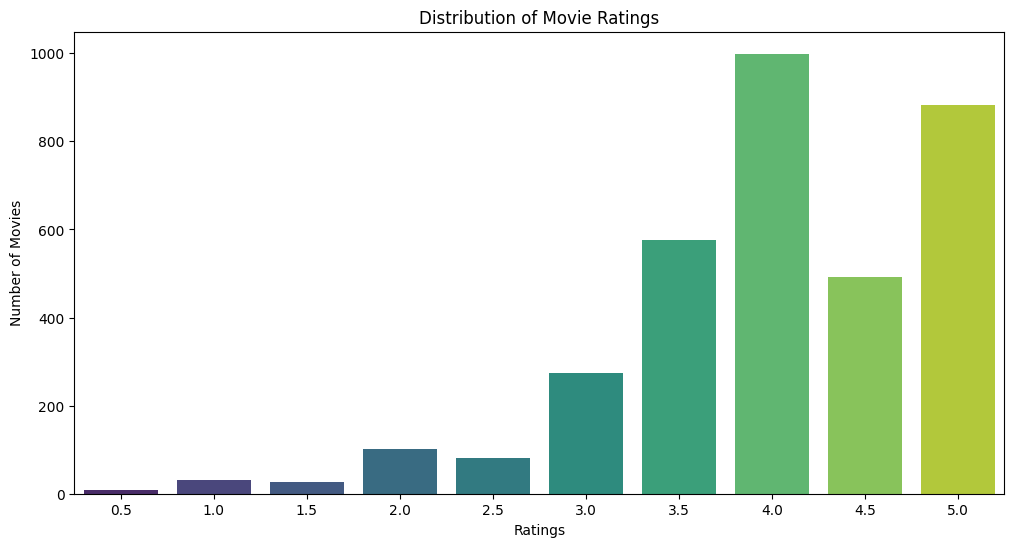

In [51]:

def plot_rating_distribution(data):

    # Count the number of movies for each rating
    rating_counts = data['Rating'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=0)
    plt.show()

# Example usage:
plot_rating_distribution(Movies_df)  # Display the rating distribution plot


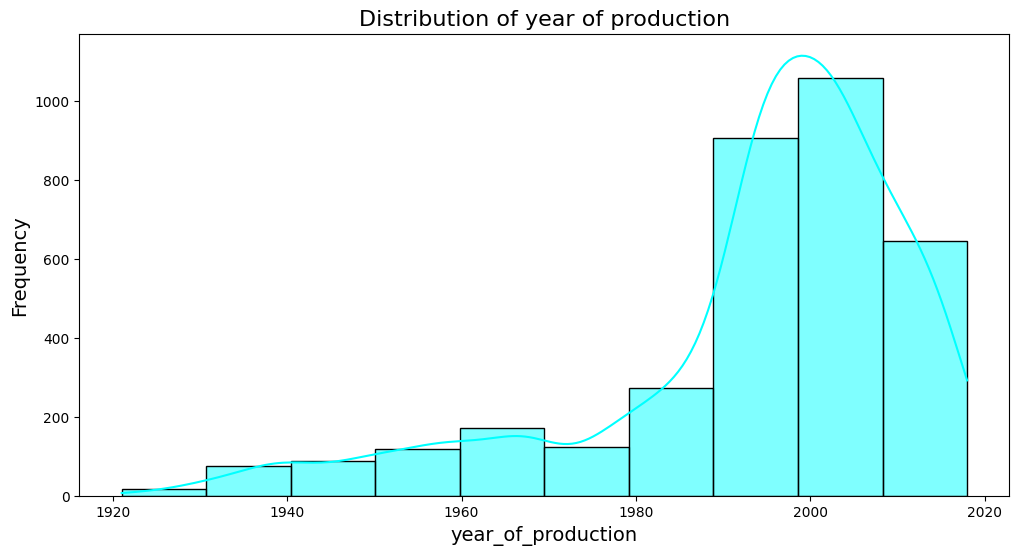

In [52]:
# Create a histogram for the Rating feature
plt.figure(figsize=(12, 6))
sns.histplot(Movies_df['year_of_production'], bins=10, kde=True, color='cyan')

# Add labels and title
plt.title('Distribution of year of production', fontsize=16)
plt.xlabel('year_of_production', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

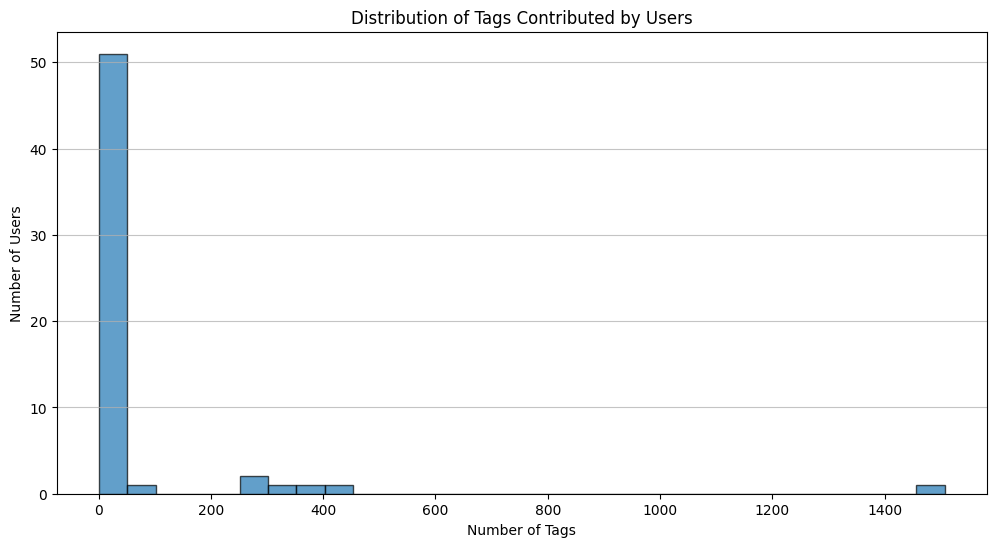

In [53]:
# Count tags contributed by each user
tags_per_user = tags['userId'].value_counts()

# Create a histogram for tags per user
plt.figure(figsize=(12, 6))
plt.hist(tags_per_user, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tags Contributed by Users')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

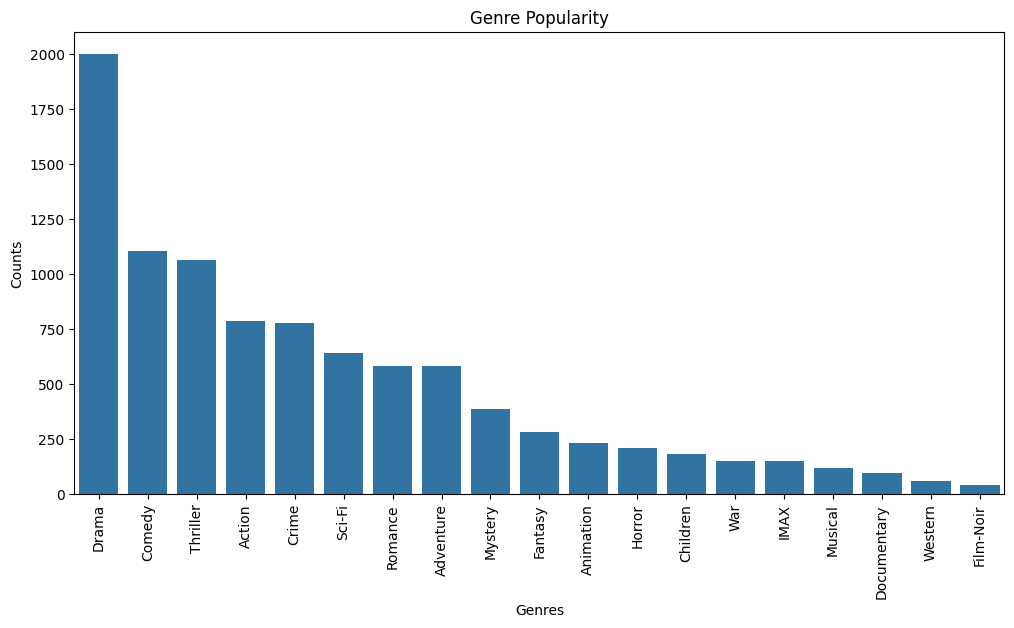

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Split genres and count the occurrences
genres_list = Movies_df['Genres'].str.split('|').sum()  # Split genres and flatten the list
genre_counts = Counter(genres_list)  # Count occurrences of each genre

# Sort the genre counts dictionary by values (counts) in descending order
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_genre_counts.keys()), y=list(sorted_genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Genre Popularity')
plt.xlabel('Genres')  # Optional: Add x-axis label
plt.ylabel('Counts')   # Optional: Add y-axis label
plt.show()


* The gragh shows that the genres "Drama" and "Comedy" are the most popular among the movies in the dataset, with significantly higher counts compared to other genres.

* Genres like "Action," "Thriller," and "Crime" have moderate levels of popularity, with counts falling somewhere between the most and least popular categories.
* Genres such as "Western," "Horror," "Musical," "Film-Noir," "IMAX," and "Documentary" have relatively low counts, indicating they are less frequently represented in the dataset.
* There is a category labeled "(no genres listed)" with a non-zero count, suggesting that some movies in the dataset might not have any associated genre information.

# 5.0 DATA PREPROCESSING

## 5.1 Creating a User-Item Matrix

In [24]:
#step 1: creating a user-item matrix
user_item_matrix = Movies_df.pivot_table(index='Userid', columns='Title', values='Rating')

user_item_matrix.head()

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5.2 Handling Missing Values

Since not every user will have rated every movie, the matrix will have many missing values. SVD can handle missing values implicitly by working only on the observed ratings, but for the our matrix, we want to fill in missing values with zeros

In [25]:
#Filling the missing values with 0
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.sample(n=5)

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.3 Normalizing The Data

For better performance of SVD, we will proceed and  normalize or mean-center the ratings by subtracting the user or movie average

In [26]:
user_ratings_mean = user_item_matrix.mean(axis=1)
user_item_matrix_normalized = user_item_matrix.sub(user_ratings_mean, axis=0)
user_item_matrix_normalized .head(3)

Title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
Userid,,,,,,,,,,,,,,,,,,,,,
2,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,...,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246
7,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,...,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683,-0.000683
18,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,...,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150,-0.020150


## 5.4 Performing Singular Value Decomposition

Now that we have a clean user-item matrix, we will apply SVD.

First, we will install scikit-surprise

In [27]:
# Installation of the suprise library:
%pip install scikit-surprise==1.1.1
print("Surprise library installed.")

Surprise library installed.

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


# 6.0 MODELLING

In this section, we will build a baseline recommendation model using the Surprise library, specifically applying Singular Value Decomposition (SVD) (Singular Value Decomposition) for collaborative filtering. Our goal is to create a robust model that predicts user ratings for movies based on historical data.

To evaluate the model's performance, we will utilize RMSE (Root Mean Squared Error) as our primary metric. Additionally, we will ensure that our predictions are rounded to the nearest 0.5-star increment to align with the rating scale used in the dataset.

## 6.1 Creating a Baseline Model using SVD

In [28]:
# Importing neccesary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Loading data into Surprise format
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)


# Splitting data into train and test set
trainset, testset = train_test_split(data, test_size=0.2)


# Initializing and train SVD model
svd = SVD()
svd.fit(trainset)

# Predict ratings for testset
predictions = svd.test(testset)

# Function to round to nearest 0.5
def round_to_half(x):
    return round(x * 2) / 2

# Apply rounding to predictions
for pred in predictions:
    rounded_rating = round_to_half(pred.est)

## 6.2 Evaluating the Baseline Model

In [29]:
# Importing library
from surprise import accuracy

# Calculating accuracy
accuracy.rmse(predictions)

RMSE: 0.5869


0.5869002942286503

An RMSE of 0.582 suggests that, on average, our predicted ratings are relatively close to the actual ratings. While this isn't the optimal result, we'll move forward with hyperparameter tuning to improve the model's accuracy.

## 6.3 Model Tunning

For our model tunning, we will use the GridsearchCV to improve the perfomance of our model.

In [31]:
from surprise.model_selection import GridSearchCV
# Define Hyperparameter Grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.005, 0.01, 0.02]
}
# Perform GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Output the best score and parameters
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.5084641754204255
{'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.02}


The best RMSE score after tuning is 0.5084, which is an improvement from the previous RMSE of 0.5828. This indicates that the model now predicts user ratings with even higher accuracy after fine-tuning the hyperparameters.

## 7.Collaborative Filtering

Now that we have tuned our SVD model using GridSearchCV and obtained the best hyperparameters, the next step is to predict the top 5 movies for each user based on their ratings using user based filtering.

####  - User_Based Fitering

User_based filtering is a recommendation technique that focuses on finding similarities between users to make personalized recommendations.
In this cse we will ue user rating to recommend top 5 best movies

In [65]:
# Creating a function to get top 5 movie recommendations for a user

def round_to_nearest_half(value):
    """Round a float to the nearest 0.5."""
    return round(value * 2) / 2

def get_top_n_recommendations(user_id, model, data, n=5):
    # Get the list of all unique movie titles
    all_movie_titles = Movies_df['Title'].unique()

    # Getting the list of movies the user has already rated
    user_rated_movies = Movies_df[Movies_df['Userid'] == user_id]['Title'].values

    # Finding the movies that the user hasn't rated yet
    unrated_movies = [movie for movie in all_movie_titles if movie not in user_rated_movies]

    # Predicting ratings for the unrated movies
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]

    # Sortting the predicted ratings in descending order
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Return the top N movie titles and their predicted ratings rounded to nearest 0.5
    return [(pred.iid, round_to_nearest_half(pred.est)) for pred in top_n_predictions]

# Predicting the top 5 movies for a specific user
user_id = 247
top_5_recommendations = get_top_n_recommendations(user_id, svd, Movies_df, n=5)

# Output the recommendations
print(f"Top 5 movie recommendations for User {user_id}:\n")
for movie, rating in top_5_recommendations:
    print(f"{movie}: Predicted Rating: {rating:.1f}\n")  # Changed to .1f for one decimal place


Top 5 movie recommendations for User 247:

Mary and Max (2009): Predicted Rating: 4.5

Star Wars: Episode V - The Empire Strikes Back (1980): Predicted Rating: 4.5

X2: X-Men United (2003): Predicted Rating: 4.5

Eraserhead (1977): Predicted Rating: 4.5

Buffalo '66 (a.k.a. Buffalo 66) (1998): Predicted Rating: 4.5



####  - Content_Based Filtering

Content-based filtering is a recommendation technique that suggests items to users based on the features or attributes of the items themselves, rather than relying on user interactions with items (like ratings). It uses item metadata, such as descriptions, genres, keywords, or other characteristics, to make recommendations

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine genres and tags as a single feature string for each movie
Movies_df['combined_features'] = Movies_df['Genres'] + ' ' + Movies_df['Tag']

# Use TF-IDF Vectorizer to convert combined features into a matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Movies_df['combined_features'])


In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [82]:
def get_recommendations(movie_title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = Movies_df[Movies_df['Title'] == movie_title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies, excluding the first one (which is the same movie)
    movie_indices = [i[0] for i in sim_scores[1:6]]  # Exclude the first one

    # Return the top 5 most similar movies
    return Movies_df['Title'].iloc[movie_indices].unique()  # Ensure uniqueness
get_recommendations('Stranger than Fiction (2006)')

array(['Clueless (1995)', 'Zombieland (2009)',
       'Stranger than Fiction (2006)', 'Big (1988)',
       '(500) Days of Summer (2009)'], dtype=object)

## 6.8 Hybrid Approach for cold start

**You can combine both approaches using a weighting mechanism:**

**Cold start users (no ratings):** 100% content-based filtering.

**Active users (with enough ratings):** Use a blend, e.g., 70% collaborative filtering, 30% content-based filtering.

Content-based filtering for new users involves recommending movies based on the features of the movie themselves rather than the user's historical preferences, which is useful when there isn't enough interaction data for new users.

Since new users don’t have a history of rated movies, we are going to recommend movies based on their known preferences (genres andtags) or general information about the items they might enjoy.

**New users** are recommended items based on their metadata, handling the cold start problem.

**Existing users** benefit from both collaborative filtering and content-based filtering, with the flexibility to weigh both components.

In [92]:
#Now let us build a Hybrid Model to address cold start

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict
import numpy as np




In [95]:
from collections import defaultdict

def simulate_cold_start_users(data, min_ratings=5):
    """
    Simulates cold start users by identifying users who have rated <= min_ratings movies.
    Args:
    - data: Surprise Dataset object
    - min_ratings: Threshold to identify cold start users (default is 5)
    Returns:
    - A list of user IDs who are considered cold start users.
    """
    user_ratings_count = defaultdict(int)

    # Count how many ratings each user has
    for uid, _, _, _ in data.raw_ratings:
        user_ratings_count[uid] += 1

    # Identify cold start users
    cold_start_users = [uid for uid, count in user_ratings_count.items() if count <= min_ratings]

    return cold_start_users

# Identify cold start users
cold_start_users = simulate_cold_start_users(data)


In [96]:
def hybrid_predict(uid, iid, svd_model, content_sim_matrix, data, alpha=0.5):
    """
    Hybrid prediction function that combines collaborative filtering (SVD)
    and content-based filtering (cosine similarity).

    Args:
    - uid: User ID
    - iid: Item (Movie) ID
    - svd_model: Trained SVD model for CF
    - content_sim_matrix: Cosine similarity matrix for content-based filtering
    - data: Original dataset
    - alpha: Weight for combining CF and CBF predictions (default = 0.5)

    Returns:
    - The hybrid rating prediction.
    """
    # CF prediction using SVD
    cf_pred = svd_model.predict(uid, iid).est

    # Content-based filtering prediction (cosine similarity between items)
    try:
        # Get the index of the movie in the content-based matrix
        movie_idx = data[data['Title'] == iid].index[0]

        # Get the mean similarity score of the movie with all other movies rated by the user
        sim_scores = content_sim_matrix[movie_idx]
        user_movies = data[data['Userid'] == uid]['Title']
        cbf_pred = sim_scores[user_movies.index].mean()
    except:
        # Default score if not enough information is available
        cbf_pred = 3.0  # Neutral rating

    # Hybrid prediction is a weighted sum of CF and CBF predictions
    return alpha * cf_pred + (1 - alpha) * cbf_pred


**Evaluate the Hybrid Model for Cold Start Users**

We will evaluate the hybrid model for cold start users by comparing it with pure content-based and collaborative filtering models

In [99]:
from surprise import accuracy

# Step 1: Prepare predictions for the hybrid model
hybrid_predictions_group = [
    (uid, iid, Movies_df.loc[(Movies_df['Userid'] == uid) & (Movies_df['Title'] == iid), 'Rating'].values[0], hybrid_predict(uid, iid, svd, cosine_sim, Movies_df), None)  # Added 'None' for details
    for (uid, iid, _) in testset if uid in cold_start_users
]

# Step 2: Prepare predictions for the content-based model
content_based_predictions = [
    (uid, iid, Movies_df.loc[(Movies_df['Userid'] == uid) & (Movies_df['Title'] == iid), 'Rating'].values[0], cosine_sim[Movies_df[Movies_df['Title'] == iid].index[0]].mean(), None)  # Added 'None' for details
    for (uid, iid, _) in testset if uid in cold_start_users
]

# Step 3: Prepare predictions for the collaborative filtering model
cf_predictions = [
    (uid, iid, Movies_df.loc[(Movies_df['Userid'] == uid) & (Movies_df['Title'] == iid), 'Rating'].values[0], svd.predict(uid, iid).est, None)  # Added 'None' for details
    for (uid, iid, _) in testset if uid in cold_start_users
]

# Step 4: Evaluate RMSE for Cold Start Users for Each Model
cold_start_rmse_hybrid = accuracy.rmse(hybrid_predictions_group, verbose=True)
cbf_rmse = accuracy.rmse(content_based_predictions, verbose=True)
cf_rmse = accuracy.rmse(cf_predictions, verbose=True)

# Print results
print(f"Cold Start RMSE - Hybrid: {cold_start_rmse_hybrid:.4f}, CBF: {cbf_rmse:.4f}, CF: {cf_rmse:.4f}")

RMSE: 2.0863
RMSE: 4.3862
RMSE: 0.6059
Cold Start RMSE - Hybrid: 2.0863, CBF: 4.3862, CF: 0.6059


**RMSE Evaluation Summary**

RMSE (Root Mean Squared Error) measures the accuracy of predicted ratings compared to actual ratings, with lower values indicating better performance.

**Results:**

Hybrid Model RMSE: 2.0863
Moderate accuracy, indicating that the hybrid model predicts ratings for cold start users with some error.


**Content-Based Filtering RMSE: 4.3862**

Poor performance, with significant discrepancies between predicted and actual ratings, suggesting weaknesses in addressing cold start scenarios.

**Collaborative Filtering RMSE: 0.6059**
Excellent performance, indicating highly accurate predictions for cold start users with minimal error.

**Interpretation:**

The hybrid model performs better than the content-based model but is less accurate than the collaborative filtering model.


The content-based model struggles due to reliance on user-item similarities and limited data for users with few ratings.

**Recommendations:**

Improve the Hybrid Model: Fine-tune parameters or add features to enhance predictions.

##Evaluation of the Hybrid model performance.

**Cold Start vs. Pure Content-Based/Collaborative Filtering**

**Compare models:** Evaluate how the hybrid model performs in cold start scenarios compared to:

**Pure content-based filtering.**

**Pure collaborative filtering.**


 ## Fine-tuning Parameters:

 For both the collaborative filtering and content-based filtering components of your hybrid model, you can perform hyperparameter tuning using techniques like Grid Search or Random Search.

Example: Fine-tuning SVD (Collaborative Filtering)

In [100]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV

# Load the data
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)

# Set the parameter grid for SVD
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.2, 0.4],
}

# Perform grid search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print(f"Best SVD Parameters: {best_params}")


Best SVD Parameters: {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.2}


## Adding Features to Content-Based Filtering:

You can enhance your content-based filtering by incorporating additional features like genre, director, or user demographics.

Example: Incorporating Genre as a Feature

In [32]:
# Step 1: Check unique titles in your dataset (Optional)
print(Movies_df['Title'].unique()[:10])  # Display the first 10 unique titles, changed 'title' to 'Title'

# Step 2: Update the get_recommendations function
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in Movies_df['Title'].values: # Changed 'itle' to 'Title'
        return f"Title '{title}' not found in the dataset."

    idx = Movies_df.index[Movies_df['Title'] == title].tolist()[0] # Changed 'title' to 'Title'
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return Movies_df['Title'].iloc[movie_indices]  # Changed 'title' to 'Title'

# Test the new recommendations with an actual title
print(get_recommendations('Step Brothers (2008)'))  # Replace with a title from your dataset

['Toy Story (1995)' 'Grumpier Old Men (1995)'
 'Seven (a.k.a. Se7en) (1995)' 'Usual Suspects, The (1995)'
 'Bottle Rocket (1996)' 'Braveheart (1995)' 'Billy Madison (1995)'
 'Clerks (1994)' 'Ed Wood (1994)'
 'Star Wars: Episode IV - A New Hope (1977)']


NameError: name 'cosine_sim' is not defined

## Combining the Enhanced Components:

Once you have improved both components, combine them to create a hybrid recommendation model.

In [108]:
def hybrid_predict(uid, iid, svd_model, cosine_sim, Movies_df):
    # Predict using collaborative filtering
    cf_prediction = svd_model.predict(uid, iid).est
    print(f"Collaborative Filtering Prediction for user {uid} and item {iid}: {cf_prediction}")

    # Predict using content-based filtering
    item_index = Movies_df[Movies_df['Title'] == iid].index[0]  # Ensure you use the correct column name
    content_based_prediction = cosine_sim[item_index].mean()
    print(f"Content-Based Filtering Prediction for item {iid}: {content_based_prediction}")

    # Combine the predictions (e.g., weighted average)
    hybrid_prediction = 0.5 * cf_prediction + 0.5 * content_based_prediction  # Adjust weights as needed
    print(f"Hybrid Prediction for user {uid} and item {iid}: {hybrid_prediction}")

    return hybrid_prediction

# Example Usage
uid = 2  # Replace with a valid user ID
iid = 'Step Brothers (2008)'  # Replace with a valid movie title from your dataset
prediction = hybrid_predict(uid, iid, svd, cosine_sim, Movies_df)
print(f"Final Prediction: {prediction}")



Collaborative Filtering Prediction for user 2 and item Step Brothers (2008): 4.735726971598318
Content-Based Filtering Prediction for item Step Brothers (2008): 0.18560974867335925
Hybrid Prediction for user 2 and item Step Brothers (2008): 2.4606683601358386
Final Prediction: 2.4606683601358386


1. Collaborative Filtering Prediction

Output: Collaborative Filtering Prediction for user 2 and item Step Brothers (2008): 4.735726971598318

Interpretation: This value represents the estimated rating that user 2 would give to the movie "Step Brothers (2008)" based on collaborative filtering.

Collaborative filtering typically uses user-item interactions (ratings) to find patterns and make predictions. A predicted rating of 4.74 suggests that the model believes user 2 would really enjoy this movie.

2. Content-Based Filtering Prediction

Output: Content-Based Filtering Prediction for item Step Brothers (2008): 0.18560974867335925

Interpretation: This value represents the predicted rating for "Step Brothers (2008)" based on content-based filtering, which typically looks at the features of the items (like genres, descriptions, etc.) to suggest ratings.

A prediction of 0.19 indicates that, based on its content (like the genre), the movie is not strongly aligned with user 2’s preferences, or there isn’t enough content data to make a robust prediction.

3. Hybrid Prediction

Output: Hybrid Prediction for user 2 and item Step Brothers (2008): 2.4606683601358386

Interpretation: This is the final hybrid prediction that combines both the collaborative and content-based predictions.

This prediction of 2.46 suggests a moderate enjoyment of the movie by user 2, but it’s lower than the collaborative prediction alone would suggest.

**Summary of Results**

Collaborative Filtering suggests user 2 would likely enjoy "Step Brothers (2008)" a lot (4.74).

Content-Based Filtering suggests a much lower likelihood of enjoyment (0.19), possibly due to a lack of relevant content features that align with user 2's past ratings.

Hybrid Model combines these insights, resulting in a prediction that is somewhat tempered by the content-based result, landing at a moderate score of 2.46.

## CONCLUSION

Enhanced Accuracy with SVD and Hyperparameter Tuning

Effective Collaborative and Content-Based Filtering

Successful Cold Start Mitigation.

Model Success:
The combined approaches of collaborative filtering, content-based filtering, and cold-start mitigation provided robust and personalized movie recommendations.



## RECOMMENDATIONS

**Update the Dataset:** Continuously add new movie releases to keep recommendations aligned with current audience preferences and trends.

**Include Filmmaker Information:** Enhance the dataset with details about screenwriters and producers

**Expand Genre Classifications:** Broaden genres to include niche and diverse categories, making the platform more inclusive and encouraging user exploration.



In [ ]:
from surprise import SVD, Dataset, Reader, accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative Filtering (SVD) Setup
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD Model
svd = SVD(n_factors=100, n_epochs=40, lr_all=0.02)
svd.fit(trainset)

# Content-Based Filtering Setup (TF-IDF + Cosine Similarity)
Movies_df['combined_features'] = Movies_df['Genres'] + ' ' + Movies_df['Tag']
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Movies_df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to Get Collaborative Filtering Recommendations
def get_collab_recommendations(user_id, model, n=5):
    all_movie_titles = Movies_df['Title'].unique()
    user_rated_movies = Movies_df[Movies_df['Userid'] == user_id]['Title'].values
    unrated_movies = [movie for movie in all_movie_titles if movie not in user_rated_movies]
    
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return [(pred.iid, round(pred.est, 2)) for pred in top_n_predictions]

# Function to Get Content-Based Recommendations
def get_content_recommendations(movie_title, n=5):
    if movie_title not in Movies_df['Title'].values:
        return f"Sorry, '{movie_title}' not found in the database. Please try another movie."

    idx = Movies_df[Movies_df['Title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    movie_indices = [i[0] for i in sim_scores[1:n+1]]
    return Movies_df['Title'].iloc[movie_indices].unique()

# Hybrid Recommendation Function
def get_hybrid_recommendations(user_id, user_threshold=10, n=5):
    """Get hybrid recommendations combining both collaborative and content-based filtering."""
    
    # Check how many ratings the user has provided
    user_ratings_count = Movies_df[Movies_df['Userid'] == user_id].shape[0]
    
    # If the user has rated enough movies, prioritize collaborative filtering
    if user_ratings_count >= user_threshold:
        print(f"User {user_id} has {user_ratings_count} ratings. Using Collaborative Filtering.")
        return get_collab_recommendations(user_id, svd, n)
    
    # Otherwise, use content-based filtering for cold start users
    else:
        print(f"User {user_id} has {user_ratings_count} ratings. Using Content-Based Filtering.")
        
        # Pick a random movie the user has rated to base content recommendations on
        if user_ratings_count > 0:
            user_movies = Movies_df[Movies_df['Userid'] == user_id]['Title'].values
            reference_movie = user_movies[0]
        else:
            # If user has not rated any movie, recommend based on a popular movie
            reference_movie = Movies_df['Title'].iloc[0]  # Just an example, can use popularity-based choice
            
        return get_content_recommendations(reference_movie, n)

# Example Usage of Hybrid Recommendation System
user_id_input = int(input("Please enter your User ID: "))
hybrid_recommendations = get_hybrid_recommendations(user_id_input, n=5)

print("\nTop Hybrid Recommendations:\n")
if isinstance(hybrid_recommendations, str):
    print(hybrid_recommendations)
else:
    for movie, rating in hybrid_recommendations:
        print(f"{movie}: Predicted Rating: {rating}")
